In [1]:
### Análisis de NetCrime - Esqueleto del Cuaderno (Preprocesamiento + Visualizaciones con Seaborn)

# 1. Import libraries
import pandas as pd
import seaborn as sns # Para visualizaciones

In [16]:
# 1. Cargar dataset
df_base = pd.read_csv('LossFromNetCrime.csv')


# 2. Renombrar columna Country a pais
if 'Country' in df_base.columns:
 df_base.rename(columns={'Country': 'pais'}, inplace=True)


# 3. Normalizar nombres de columnas
df_base.columns = (
df_base.columns
.str.strip()
.str.lower()
.str.replace('-', '_')
)

In [17]:
# 4. Transformar de formato wide a largo
df_melt = df_base.melt(
id_vars=['pais'],
var_name='anio_tipo',
value_name='valor'
)


# 5. Separar 'anio_tipo' en 'anio' y 'tipo_incidente'
df_melt[['anio', 'tipo_incidente']] = (
df_melt['anio_tipo']
.str.split('_', expand=True)
)
# Convertir 'anio' a entero
df_melt['anio'] = df_melt['anio'].astype(int)


# 6. Pivotear para columnas de quejas y perdidas
df_limpios = (
df_melt
.pivot_table(
index=['pais', 'anio'],
columns='tipo_incidente',
values='valor'
)
.reset_index()
)
# Renombrar columnas sin caracteres especiales
df_limpios.rename(columns={
'complaints': 'quejas',
'losses': 'perdidas'
}, inplace=True)

In [18]:
# 7. Ordenar y revisar resultados
df_limpios = df_limpios.sort_values(['pais', 'anio']).reset_index(drop=True)


# Mostrar las primeras filas
df_limpios.head()

tipo_incidente,pais,anio,quejas,perdidas
0,AE,2019,5503.0,48101706.0
1,AE,2020,7390.0,81178182.0
2,AE,2021,10164.0,131934602.0
3,AE,2022,10042.0,187062157.0
4,AE,2023,11034.0,244238485.0


### 🔹 Ranking de Países por Pérdidas (Top 15)

Mostramos los 15 países con mayores pérdidas en el año elegido (`anio_objetivo = 2020`).  
Se usa un gráfico de **barras horizontales**, lo que facilita comparar rápidamente los valores.


C:\Users\jjala\AppData\Local\Temp\ipykernel_3756\2493597005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Top 15 Países por Pérdidas - 2020')

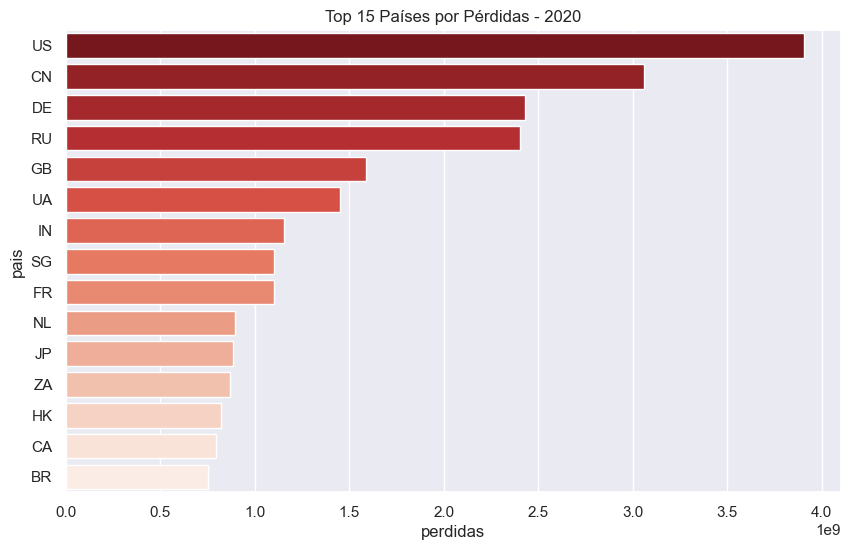

In [25]:
anio_objetivo = 2020
ranking_perdidas = (
    df_limpios[df_limpios['anio']==anio_objetivo]
    .sort_values('perdidas', ascending=False)
    .head(15)
)

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(
    data=ranking_perdidas,
    x='perdidas', y='pais',
    palette='Reds_r', orient='h'
).set_title(f"Top 15 Países por Pérdidas - {anio_objetivo}")